## **DATA CLEANING**

In [2]:
from google.colab import filesimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

uploaded = files.upload()

Saving Road accident.csv to Road accident.csv


In [3]:
import pandas as pd
import numpy as np

# Load your dataset (upload file in Colab or use the correct path)
df = pd.read_csv('Road accident.csv')

df.head()


,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,BS0000001,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,BS0000002,05-01-2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,BS0000003,04-01-2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,BS0000004,05-01-2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc
4,BS0000005,06-01-2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [5]:
df.shape
df.columns


Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [6]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("-", "_")
df.columns


Index(['Accident_Index', 'Accident_Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [8]:
df = df.drop(columns=['Carriageway_Hazards'])


In [9]:
df['Time'] = df['Time'].fillna(df['Time'].mode()[0])


In [10]:
df.isnull().sum()

,0
Accident_Index,0
Accident_Date,0
Day_of_Week,0
Junction_Control,0
Junction_Detail,0
Accident_Severity,0
Latitude,0
Light_Conditions,0
Local_Authority_(District),0
Longitude,0


In [11]:
# Convert all object columns
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.title()


In [12]:
df['Accident_Severity'] = df['Accident_Severity'].replace({
    'Fetal': 'Fatal',
    'Fetl': 'Fatal',
    'Fatl': 'Fatal'
})


In [13]:
df['Accident_Severity'].unique()


array(['Serious', 'Slight', 'Fatal'], dtype=object)

In [14]:
# Convert date column if present
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convert numeric columns
num_cols = ['Number_of_Vehicles', 'Number_of_Casualties']

for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [15]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


In [16]:
df.drop_duplicates(inplace=True)


In [17]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident_Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Longitude                   307973 non-null  float64
 10  Number_of_Casualties        307973 non-null  int64  
 11  Number_of_Vehicles          307973 non-null  int64  
 12  Police_Force                307973 non-null  object 
 13  Road_Surface_C

,Accident_Index,Accident_Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
count,307973,307973,307973,307973,307973,307973,307973.000000,307973,307973,307973.000000,307973.000000,307973.000000,307973,307973,307973,307973.000000,307973,307973,307973,307973
unique,307973,730,7,7,9,3,NaN,5,422,NaN,NaN,NaN,51,5,5,NaN,1439,2,8,15
top,Bs0307973,13-11-2021,Friday,Give Way Or Uncontrolled,Not At Junction Or Within 20 Metres,Slight,NaN,Daylight,Birmingham,NaN,NaN,NaN,Metropolitan Police,Dry,Single Carriageway,NaN,17:00,Urban,Fine No High Winds,Car
freq,1,692,50529,150045,123094,263280,NaN,227286,6165,NaN,NaN,NaN,46789,208967,230612,NaN,2950,198532,244496,239794
mean,NaN,NaN,NaN,NaN,NaN,NaN,52.487005,NaN,NaN,-1.368884,1.356882,1.829063,NaN,NaN,NaN,38.866037,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1.339011,NaN,NaN,1.356092,0.815857,0.710477,NaN,NaN,NaN,14.032933,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,49.914488,NaN,NaN,-7.516225,1.000000,1.000000,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,51.485248,NaN,NaN,-2.247937,1.000000,1.000000,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,52.225943,NaN,NaN,-1.349258,1.000000,2.000000,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,53.415517,NaN,NaN,-0.206810,1.000000,2.000000,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,NaN


In [19]:
df.to_csv('/content/cleaned_road_accident.csv', index=False)


# EDA in Python

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [21]:
df = pd.read_csv('/content/cleaned_road_accident.csv')
df.head()


,Accident_Index,Accident_Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,Bs0000001,01-01-2021,Thursday,Give Way Or Uncontrolled,T Or Staggered Junction,Serious,51.512273,Daylight,Kensington And Chelsea,-0.201349,1,2,Metropolitan Police,Dry,One Way Street,30,15:11,Urban,Fine No High Winds,Car
1,Bs0000002,05-01-2021,Monday,Give Way Or Uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington And Chelsea,-0.199248,11,2,Metropolitan Police,Wet Or Damp,Single Carriageway,30,10:59,Urban,Fine No High Winds,Taxi/Private Hire Car
2,Bs0000003,04-01-2021,Sunday,Give Way Or Uncontrolled,T Or Staggered Junction,Slight,51.486668,Daylight,Kensington And Chelsea,-0.179599,1,2,Metropolitan Police,Dry,Single Carriageway,30,14:19,Urban,Fine No High Winds,Taxi/Private Hire Car
3,Bs0000004,05-01-2021,Monday,Auto Traffic Signal,T Or Staggered Junction,Serious,51.507804,Daylight,Kensington And Chelsea,-0.203110,1,2,Metropolitan Police,Frost Or Ice,Single Carriageway,30,08:10,Urban,Other,Motorcycle Over 500Cc
4,Bs0000005,06-01-2021,Tuesday,Auto Traffic Signal,Crossroads,Serious,51.482076,Darkness - Lights Lit,Kensington And Chelsea,-0.173445,1,2,Metropolitan Police,Dry,Single Carriageway,30,17:25,Urban,Fine No High Winds,Car


In [22]:
df.describe(include='all')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident_Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Longitude                   307973 non-null  float64
 10  Number_of_Casualties        307973 non-null  int64  
 11  Number_of_Vehicles          307973 non-null  int64  
 12  Police_Force                307973 non-null  object 
 13  Road_Surface_C

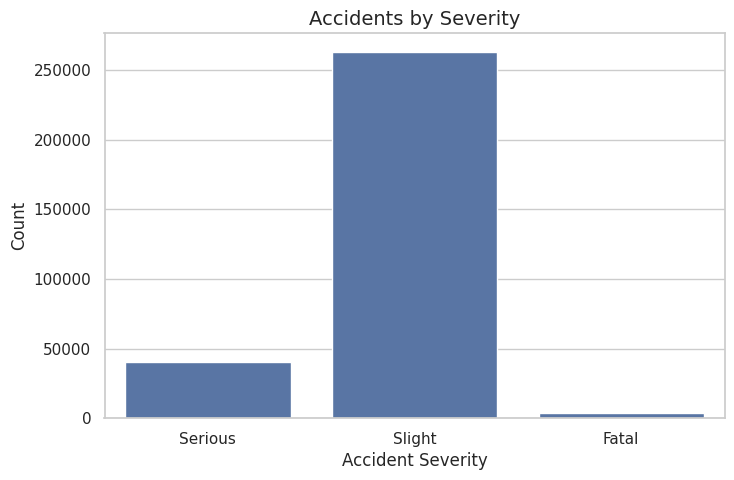

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x='Accident_Severity', data=df)
plt.title("Accidents by Severity", fontsize=14)
plt.xlabel("Accident Severity")
plt.ylabel("Count")
plt.show()


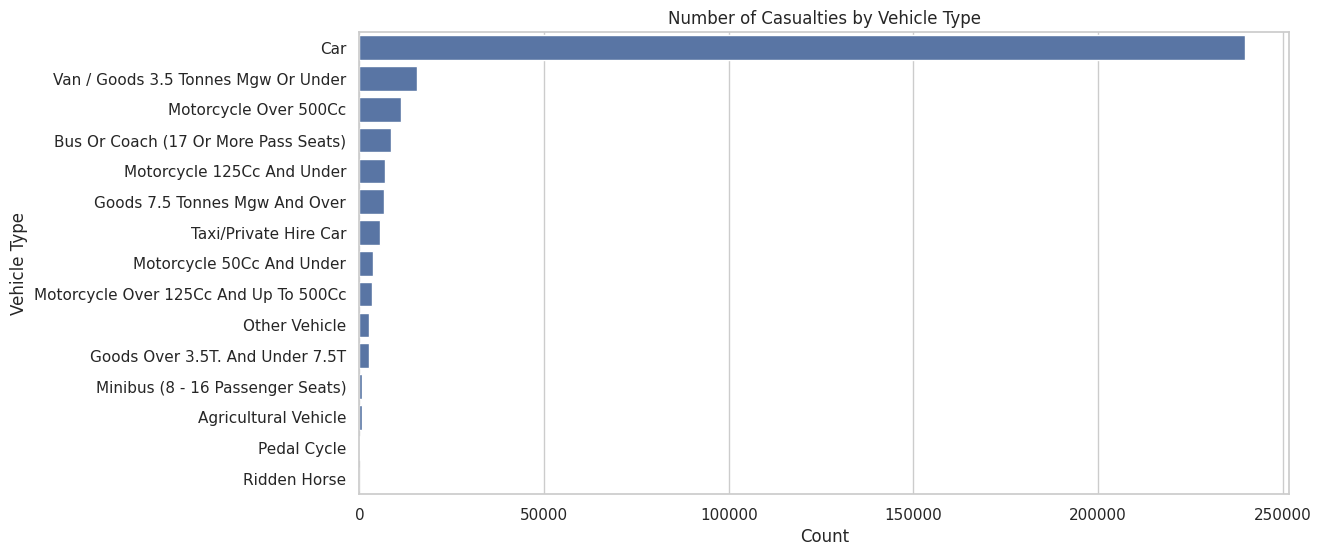

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(y='Vehicle_Type', data=df, order=df['Vehicle_Type'].value_counts().index)
plt.title("Number of Casualties by Vehicle Type")
plt.xlabel("Count")
plt.ylabel("Vehicle Type")
plt.show()


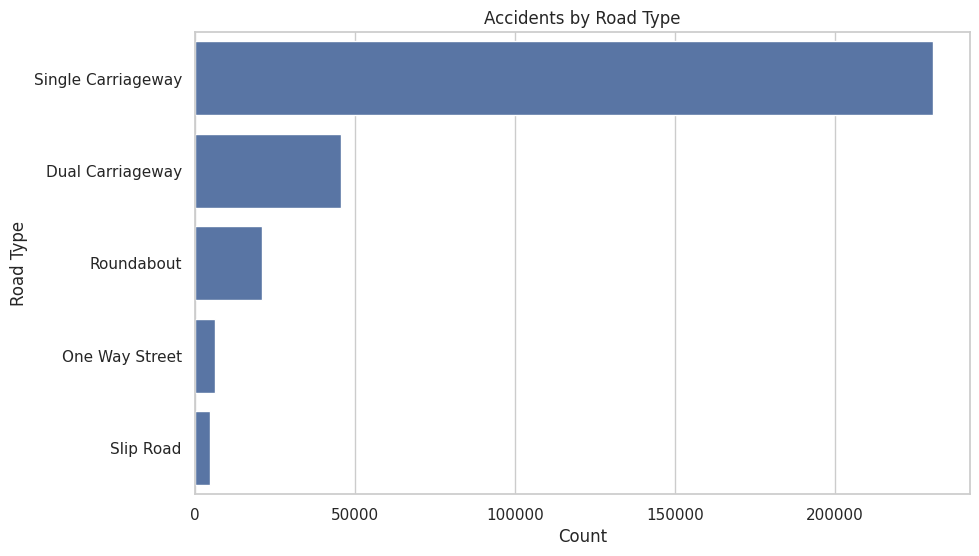

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(y='Road_Type', data=df, order=df['Road_Type'].value_counts().index)
plt.title("Accidents by Road Type")
plt.xlabel("Count")
plt.ylabel("Road Type")
plt.show()


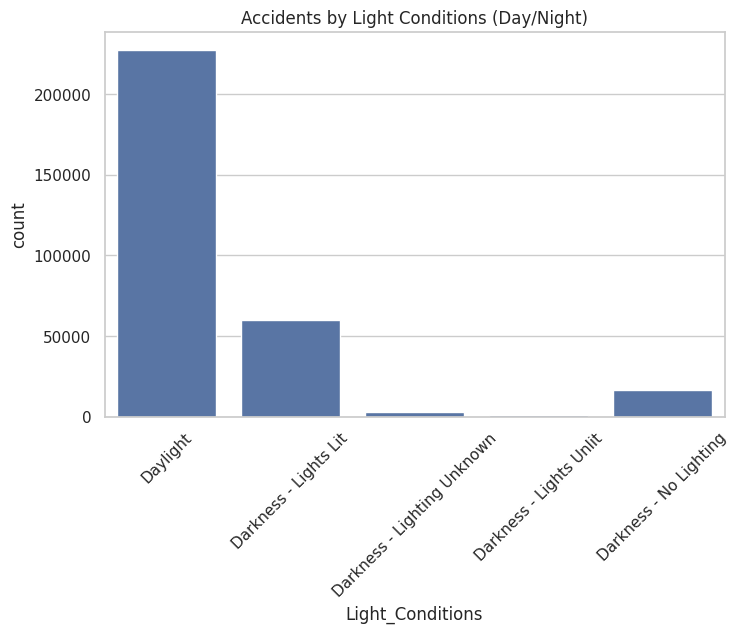

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(x='Light_Conditions', data=df)
plt.title("Accidents by Light Conditions (Day/Night)")
plt.xticks(rotation=45)
plt.show()


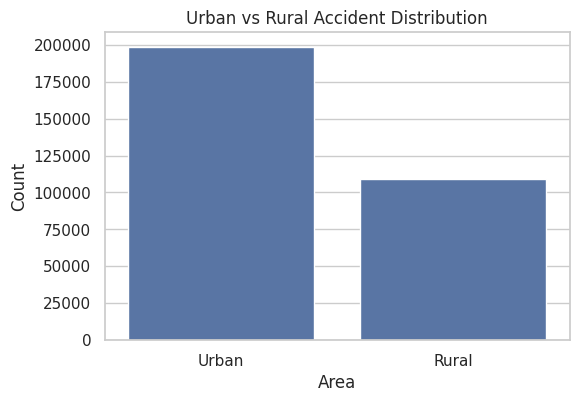

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x='Urban_or_Rural_Area', data=df)
plt.title("Urban vs Rural Accident Distribution")
plt.xlabel("Area")
plt.ylabel("Count")
plt.show()

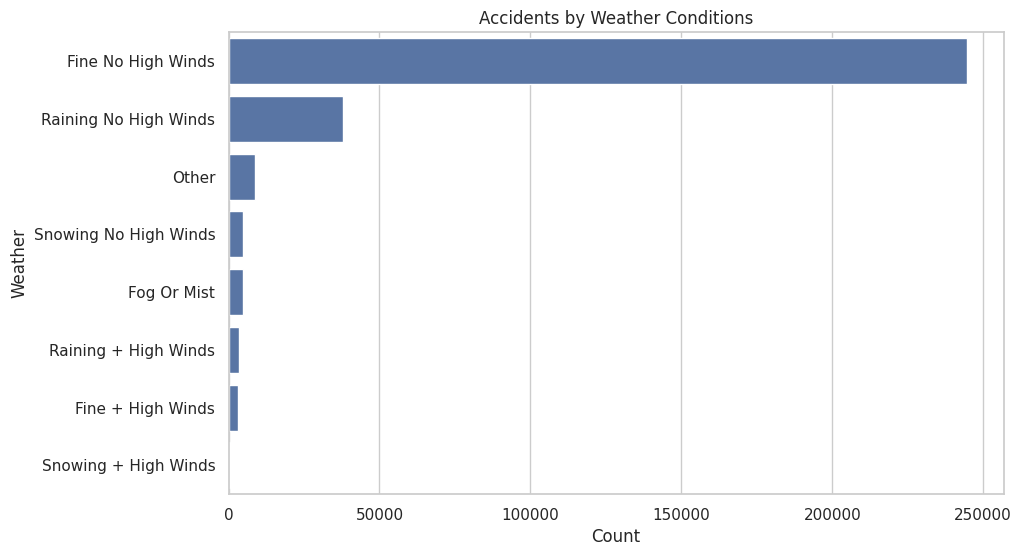

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(y='Weather_Conditions', data=df, order=df['Weather_Conditions'].value_counts().index)
plt.title("Accidents by Weather Conditions")
plt.xlabel("Count")
plt.ylabel("Weather")
plt.show()


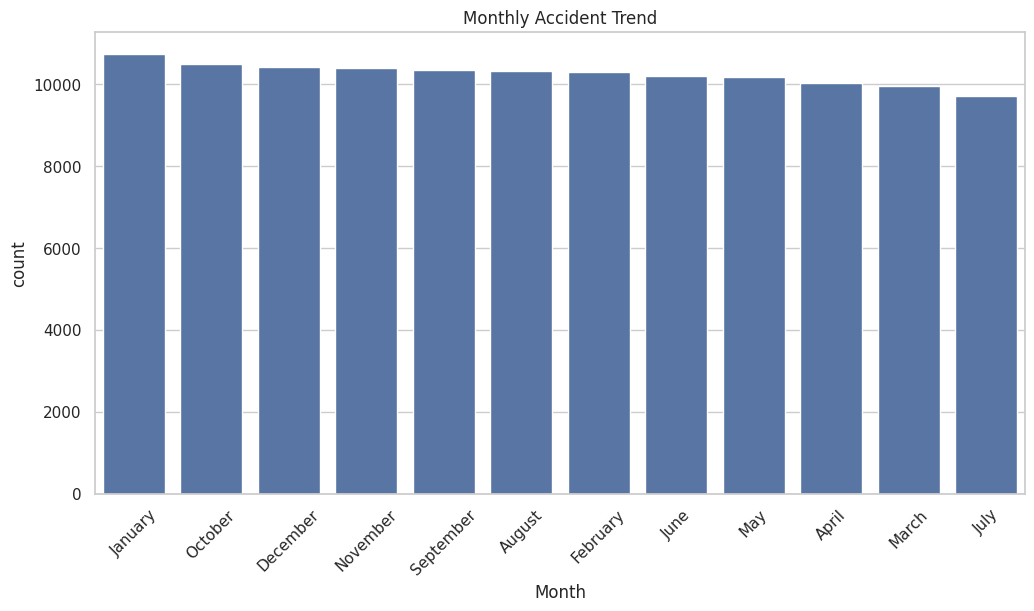

In [30]:
df['Accident_Date'] = pd.to_datetime(df['Accident_Date'], errors='coerce')
df['Month'] = df['Accident_Date'].dt.month_name()

plt.figure(figsize=(12,6))
sns.countplot(x='Month', data=df, order=df['Month'].value_counts().index)
plt.title("Monthly Accident Trend")
plt.xticks(rotation=45)
plt.show()


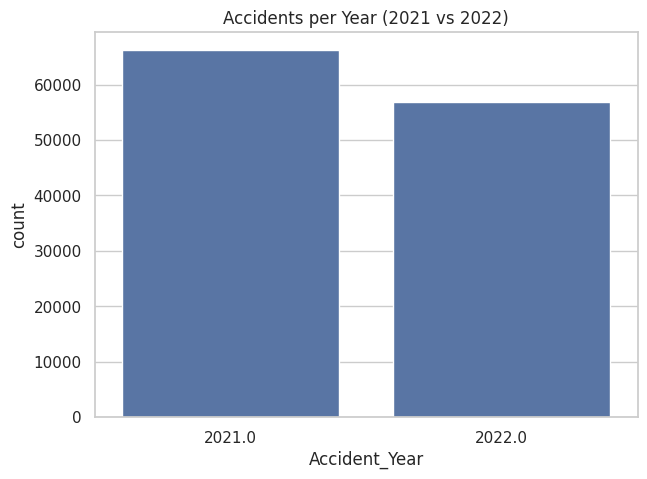

In [32]:
df['Accident_Year'] = df['Accident_Date'].dt.year
plt.figure(figsize=(7,5))
sns.countplot(x='Accident_Year', data=df)
plt.title("Accidents per Year (2021 vs 2022)")
plt.show()

In [16]:
from google.colab import files
uploaded = files.upload()


Saving Road accident.csv to Road accident.csv


In [18]:
import os
os.listdir()


['.config', 'Road accident.csv', 'sample_data']

In [19]:
import pandas as pd

df = pd.read_csv('Road accident.csv')
df.head()


,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,BS0000001,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,BS0000002,05-01-2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,BS0000003,04-01-2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,BS0000004,05-01-2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc
4,BS0000005,06-01-2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


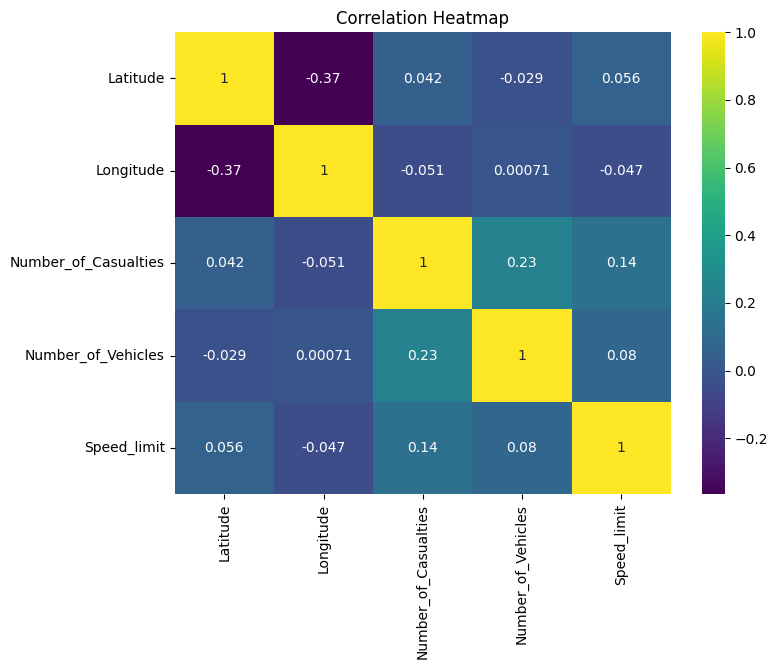

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()
